In [56]:
#импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import scipy
from scipy import stats
from scipy.stats import levene
import numpy as np
import sklearn
from sklearn import datasets
from scipy.stats import bartlett

In [57]:
#импорт данных
df = pd.read_excel('variant_40.xlsx', sheet_name='v40_1')
df = pd.DataFrame(df)
df.head()

,Group,Value
0,A,120.61
1,A,135.41
2,A,138.73
3,A,129.76
4,A,140.93


In [98]:
#выборка А
df_a = df[df['Group'] == 'A']
df_a.head()

,Group,Value
0,A,120.61
1,A,135.41
2,A,138.73
3,A,129.76
4,A,140.93


In [97]:
#Выборка B
df_b = df[df['Group'] == 'B']
df_b.head()

,Group,Value
35,B,176.73
36,B,160.38
37,B,131.66
38,B,162.22
39,B,166.89


In [96]:
df_bс = df[df['Group'] == 'B']
df_bс.head()

,Group,Value
35,B,176.73
36,B,160.38
37,B,131.66
38,B,162.22
39,B,166.89


# Проверка выборок на нормальность
##### Для построения диаграммы воспользуемся библиотекой Seborn.

Text(0.5, 1.0, 'Гистограмма частот для выборки А')

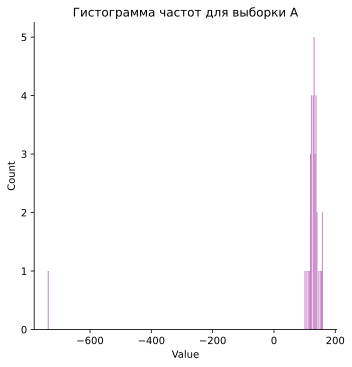

In [101]:
#Группа А
sns_plot = sns.displot(x='Value', binwidth=3,
            data=df_a,color = 'violet')
plt.title("Гистограмма частот для выборки А")

Text(0.5, 1.0, 'Гистограмма частот для выборки  B')

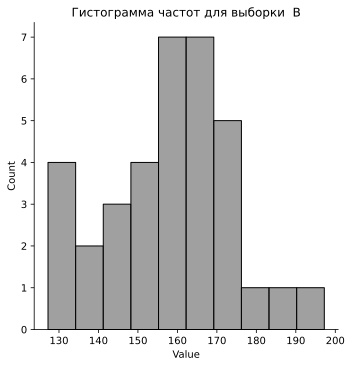

In [100]:
#Группа В
sns_plot = sns.displot(x='Value', binwidth=7,
            data=df_b,color = 'grey')
plt.title("Гистограмма частот для выборки  B")

Text(0.5, 1.0, 'Box plot')

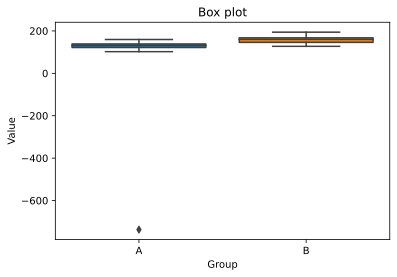

In [63]:
#Построение boxplot для двух групп
sns.boxplot(x=df["Group"], y=df["Value"])
plt.title("Box plot")

##### В выборке "А" можно заметить,  что присутствует выброс "экстремального" значения. Выбросы влияют на нормальность распределения. 


In [64]:
#Обратимся к математическим методам обнаружения выбросов и начнем со стандартизованной оценки: 
#Получим абcолютое значение (модуль) чисел признаков 
z = np.abs(stats.zscore(df_a['Value']))
print(z)

[9.73364092e-02 1.99216102e-01 2.22070195e-01 1.60322841e-01 2.37214474e-01 7.14534602e-02 3.51140752e-01
 3.03573950e-02 2.69361647e-01 8.94889194e-02 1.73746179e-01 3.65252466e-01 1.07249028e-01 1.58257712e-01
 5.62403439e-02 2.31913976e-01 2.15255270e-01 1.44283673e-01 1.42149707e-01 3.13417731e-01 1.08556943e-01
 1.84278336e-01 1.69409408e-01 1.98803076e-01 1.79322027e-01 1.11172773e-01 1.57087472e-01 2.17182724e-01
 1.02499231e-01 3.30971326e-01 1.69409408e-01 7.97139759e-02 3.09769336e-03 5.80796854e+00 2.21450657e-01]


###### Приведенный выше вывод - это значения z - оценки каждого элемена данных столбца для выборки А.  


In [65]:
#отсечем значения, лежавшие в пределах трех стандартных отклолений 
threshold = 3
print(np.where(z > 3))

(array([33], dtype=int64),)


In [95]:
#Удаление найденного выброса
df_blowout = df.loc[df.Value > -737]
df_blowout

,Group,Value
0,A,120.61
1,A,135.41
2,A,138.73
3,A,129.76
4,A,140.93
...,...,...
65,B,148.70
66,B,155.70
67,B,172.27
68,B,157.17


# Построение графиков после удаления выброса

Text(0.5, 1.0, 'Box plot после удаления выброса')

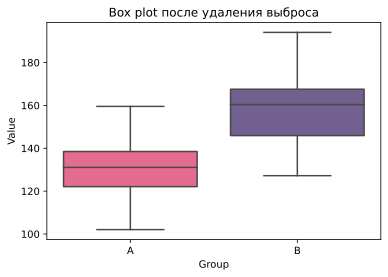

In [93]:
#Построение boxplot после удаления выброса 
colors = ['#F85888', '#705898'] #цвет
sns.boxplot(x=df_blowout["Group"], y=df_blowout["Value"],palette=colors)
plt.title("Box plot после удаления выброса")

Text(0.5, 1.0, 'Коробчатая диаграмма рассеяния')

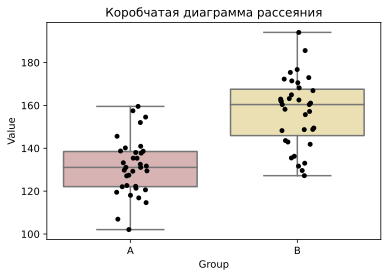

In [94]:
#Коробчатая диаграмма рассеяния без выброса
colors = ['#ddadaf', '#f3e5ab']#цвет
sns.boxplot(x=df_blowout["Group"], y=df_blowout["Value"], palette=colors) #построение box plot
sns.stripplot (x=df_blowout["Group"], y=df_blowout["Value"],color ='black') #точки рассеяния
plt.title("Коробчатая диаграмма рассеяния")

In [99]:
#Обновленный df после удаления выброса
df_new = df_blowout[df_blowout['Group'] == 'A']
df_new.head()

,Group,Value
0,A,120.61
1,A,135.41
2,A,138.73
3,A,129.76
4,A,140.93


Text(0.5, 1.0, 'Гистограмма частот для выборки  А после удаления выброса')

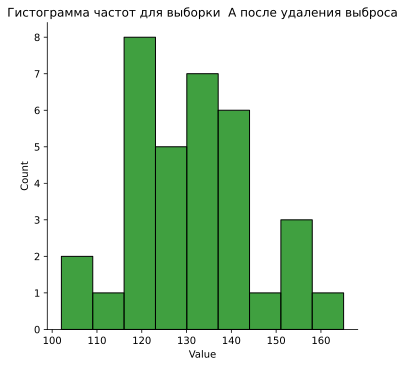

In [92]:
#Группа А, после удаления выброса
sns_plot = sns.displot(x='Value', binwidth=7,
            data=df_new, color = 'green') #построение диаграммы
plt.title("Гистограмма частот для выборки  А после удаления выброса") #подпись заголовка

# Тест Шапиро–Уилка. Нормальность распределения. 

In [72]:
#Нормальность распределения можно определитть с помощью критерия Шапиро-Уилка. (Расчет с выбросом)
#Для первой выборки А
#В качестве  критического значения в большенстве случаев берется 0.05.
stat, p = scipy.stats.shapiro(df_a['Value']) # тест Шапиро-Уилка
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05 #критическое значение
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')



Statistics=0.231, p-value=0.000
Отклонить гипотезу о нормальности


In [73]:
#Проверка на нормальность с помощью критерия Шапиро-Уилка. (Расчет без выброса)
#Для  выборки А
#В качестве  критического значения в большенстве случаев берется 0.05.
stat, p = scipy.stats.shapiro(df_new['Value']) # тест Шапиро-Уилка
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05 #критическое значение
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')


Statistics=0.979, p-value=0.751
Принять гипотезу о нормальности


In [74]:
#Нормальность распределения можно определитть с помощью критерия Шапиро-Уилка.
#Для второй выборки В
#В качестве  критического значения в большенстве случаев берется 0.05.
stat, p = scipy.stats.shapiro(df_b['Value']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05 #критическое значение
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')



Statistics=0.974, p-value=0.560
Принять гипотезу о нормальности


# Описательная статистика выборок

In [75]:
#Расчет производился с выбросом. Группа А
df_a.describe()

,Value
count,35.000000
mean,106.470000
std,147.390215
min,-737.250000
25%,121.705000
50%,131.080000
75%,138.330000
max,159.530000


In [76]:
#Без выброса. Группа А
df_new.describe()

,Value
count,34.000000
mean,131.285294
std,13.270116
min,102.060000
25%,122.097500
50%,131.080000
75%,138.485000
max,159.530000


##### Если сравнить описательную статистику выборки А до удаления выброса и после, то можно заметить:после удаления выброса стандартное отклонение уменьшилось примерно в 11 раз, изменилось минимальное значение и среднее.

In [77]:
#Для группы В
df_b.describe()

,Value
count,35.000000
mean,157.182286
std,16.181203
min,127.220000
25%,145.915000
50%,160.380000
75%,167.540000
max,194.050000


In [78]:
#se (А) до удаления выброса 
df_a["Value"].sem()

24.913493451669652

In [79]:
#se (А) после удаления выброса
df_new["Value"].sem()

2.275806109179008

In [80]:
#Se (В)
df_b["Value"].sem()

2.7351225706703963

# Тест Левена  на однородность дисперсии

In [81]:
#Тест Левена для данных без выброса
alpha = 0.05 #критическое значение
w_stats, p_value = levene(df_new ['Value'],df_b ['Value'], center = 'mean' )
if p_value > alpha :
    print ( "Принять нулевую гипотизу",w_stats, p_value)
else :
    print ( "Отклонить нулевую гипотизу", w_stats, p_value )

Принять нулевую гипотизу 1.9106295983496222 0.17148413023683537


In [82]:
#Тест Левена для данных с выбросом
alpha = 0.05 #критическое значение
w_stats, p_value = levene(df_a['Value'],df_b ['Value'], center = 'mean' )
if p_value > alpha :
    print ( "Принять нулевую гипотизу",w_stats, p_value)
else :
    print ( "Отклонить нулевую гипотизу", w_stats, p_value )

Принять нулевую гипотизу 2.2660923817612177 0.13686412329208086


# t–тест

In [149]:
stats.ttest_ind(df_new ['Value'],df_b ['Value'])

Ttest_indResult(statistic=-7.257359663271011, pvalue=5.234858836745461e-10)

In [151]:
t = float(input('t for both tails:'))
df = int(input('Degrees of freedom:'))
p_value = 2*(1-stats.t.cdf(t, df))
print('P(X <',-t,'or X >', t,') = %6.4f'  %(p_value))

t for both tails:-7.25
Degrees of freedom:69
P(X < 7.25 or X > -7.25 ) = 2.0000


##### По результатам теста p =2,0. Критическое значение по таблице 2,649, следовательно, можно сделать вывод, что между выборками отсутствует статистически значимые различия.